In [2]:
pip install sounddevice scipy matplotlib python_speech_features

  Using cached sounddevice-0.4.4-py3-none-macosx_10_6_x86_64.macosx_10_6_universal2.whl (108 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=f5a7a106c957894fde97abd006eeb8ab747319f46165df22baf403fa601b7a63
  Stored in directory: /Users/jsanchez/Library/Caches/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features
You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#------------------------------------------------------------------------------------------------------------------
#   Speech data processing
#------------------------------------------------------------------------------------------------------------------
import pickle
import numpy as np
from scipy import stats
from scipy import signal
import matplotlib.pyplot as plt
import sounddevice as sd
from python_speech_features import mfcc
# Load audio records
fs = 44100
file_name = '04_29_2022_16_29_14.obj'
inputFile = open(file_name, 'rb')
data = pickle.load(inputFile)
n_trials = len(data)
# Plot one record
t = 5
dt = 1/fs
t_size = data[t][2].shape[0]
x = np.arange(0, t_size*dt, dt)
figure, axis = plt.subplots(2, 1)
axis[0].plot(x, data[t][2][:,0])
axis[0].set_title("Canal 1")
axis[1].plot(x, data[t][2][:,1])
axis[1].set_title("Canal 2")
plt.show()
# Filter signals
filt = signal.iirfilter(4, [10, 15000], rs=60, btype='band',
                       analog=False, ftype='cheby2', fs=fs,
                       output='ba')
filtered = []
for tr in data:
    ff1 = signal.filtfilt(filt[0], filt[1], tr[2][:,0], method='gust')
    ff2 = signal.filtfilt(filt[0], filt[1], tr[2][:,1], method='gust')
    filtered.append(np.column_stack((ff1, ff2)))
figure, axis = plt.subplots(2, 1)
axis[0].plot(x, filtered[t][:,0])
axis[0].set_title("Canal 1")
axis[1].plot(x, filtered[t][:,1])
axis[1].set_title("Canal 2")
plt.show()
sd.play(filtered[t], fs)
sd.wait()
sd.play(data[t][2], fs)
sd.wait()
# Calculate MFCC features
mfcc_feat = mfcc(filtered[t], fs, nfft = 2048)
plt.matshow(mfcc_feat.T)
plt.show()
features = []
for tr in data:
    mfcc_feat = mfcc(tr[2], fs, nfft = 2048)
    features.append(mfcc_feat.flatten())
# Build x and y arrays
x = np.array(features)
y = [row[1] for row in data]
#------------------------------------------------------------------------------------------------------------------
#   End of file
#------------------------------------------------------------------------------------------------------------------

FileNotFoundError: [Errno 2] No such file or directory: '04_29_2022_16_29_14.obj'

In [2]:
pip install numpy

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sounddevice

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy scipy matplotlib sounddevice

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#IGNORAR ESTO
# !sudo apt-get install libportaudio2


In [7]:
import pickle
import numpy as np
from scipy import stats
from scipy import signal
import matplotlib.pyplot as plt
import sounddevice as sd
from python_speech_features import mfcc

In [24]:
#----------------------------------------------------------------------------------
#--------------------------------
#   Speech data aquisition
#----------------------------------------------------------------------------------
#--------------------------------
import time
import random
import numpy as np
import sounddevice as sd
import pickle
from datetime import datetime
# Experiment configuration
conditions = [('Si', 1), ('No', 2), ('Hola', 3), ('Adios', 4), ('Más', 5), ('Menos', 6)]
n_trials = 5
fixation_cross_time = 2
preparation_time = 0.3
training_time = 2
rest_time = 1
trials = n_trials*conditions
random.shuffle(trials)
fs=44100    
# Data aquisition
data = []
for t in trials:
    # Fixation cross
    print ("*********")    
    time.sleep(fixation_cross_time)    
    
    # Preparation time
    print (t[0])
    time.sleep(preparation_time)
    # Task    
    recording = sd.rec(training_time * fs, samplerate=fs, 
channels=1,dtype='float64')    
    sd.wait()
    data.append((t[0], t[1], recording))
    # Rest time
    print ("----Descansa----")
    time.sleep(rest_time)
# Play records
for t in data:
    sd.play(t[2], fs)
    sd.wait()
# Save data
now = datetime.now().strftime("%m_%d_%Y_%H_%M_%S")
outputFile = open(now + '.obj', 'wb')
pickle.dump(data, outputFile)
outputFile.close()
#----------------------------------------------------------------------------------
#--------------------------------
#   End of file
#----------------------------------------------------------------------------------

*********
Menos
----Descansa----
*********
Hola
----Descansa----
*********
Más
----Descansa----
*********
Hola
----Descansa----
*********
Hola
----Descansa----
*********
Adios
----Descansa----
*********
No
----Descansa----
*********
Más
----Descansa----
*********
Menos
----Descansa----
*********
No
----Descansa----
*********
No
----Descansa----
*********
Adios
----Descansa----
*********
Hola
----Descansa----
*********
Si
----Descansa----
*********
Más
----Descansa----
*********
Si
----Descansa----
*********
Adios
----Descansa----
*********
Adios
----Descansa----
*********
Más
----Descansa----
*********
Adios
----Descansa----
*********
No
----Descansa----
*********
Si
----Descansa----
*********
No
----Descansa----
*********
Menos
----Descansa----
*********
Menos
----Descansa----
*********
Si
----Descansa----
*********
Menos
----Descansa----
*********
Hola
----Descansa----
*********
Más
----Descansa----
*********
Si
----Descansa----


In [25]:
pip install python_speech_features

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install sklearn

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


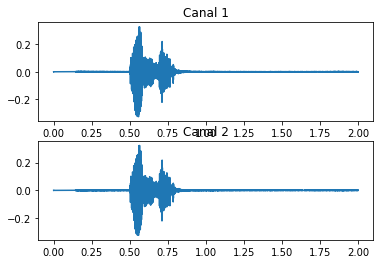

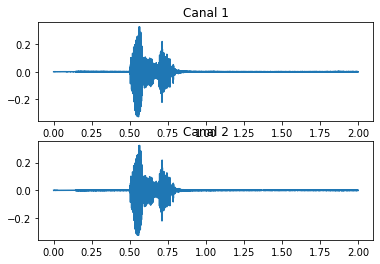

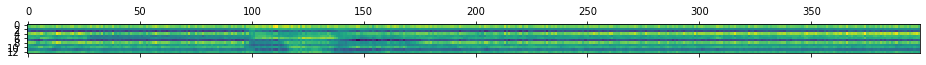

In [13]:
#----------------------------------------------------------------------------------
#--------------------------------
#   Speech data processing
#----------------------------------------------------------------------------------
#--------------------------------
import pickle
import numpy as np
from scipy import stats
from scipy import signal
import matplotlib.pyplot as plt
import sounddevice as sd
from python_speech_features import mfcc
# Load audio records
fs = 44100
file_name = '05_20_2022_00_35_58.obj'
inputFile = open(file_name, 'rb')
data = pickle.load(inputFile)
n_trials = len(data)
# Plot one record
t = 5
dt = 1/fs
t_size = data[t][2].shape[0]
x = np.arange(0, t_size*dt, dt)
figure, axis = plt.subplots(2, 1)
axis[0].plot(x, data[t][2][:,0])
axis[0].set_title("Canal 1")
axis[1].plot(x, data[t][2][:,1])
axis[1].set_title("Canal 2")
plt.show()
# Filter signals
filt = signal.iirfilter(4, [10, 15000], rs=60, btype='band',
                       analog=False, ftype='cheby2', fs=fs,
                       output='ba')
filtered = []
for tr in data:
    ff1 = signal.filtfilt(filt[0], filt[1], tr[2][:,0], method='gust')
    ff2 = signal.filtfilt(filt[0], filt[1], tr[2][:,1], method='gust')
    filtered.append(np.column_stack((ff1, ff2)))
figure, axis = plt.subplots(2, 1)
axis[0].plot(x, filtered[t][:,0])
axis[0].set_title("Canal 1")
axis[1].plot(x, filtered[t][:,1])
axis[1].set_title("Canal 2")
plt.show()
sd.play(filtered[t], fs)
sd.wait()
sd.play(data[t][2], fs)
sd.wait()
# Calculate MFCC features
mfcc_feat = mfcc(filtered[t], fs, nfft = 2048)
plt.matshow(mfcc_feat.T)
plt.show()
features = []
for tr in data:
    mfcc_feat = mfcc(tr[2], fs, nfft = 2048)
    features.append(mfcc_feat.flatten())
# Build x and y arrays
x = np.array(features)
y = [row[1] for row in data]
#----------------------------------------------------------------------------------
#--------------------------------
#   End of file
#----------------------------------------------------------------------------------
#--------------------------------

In [14]:
y = np.array(y)

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [16]:
from sklearn import svm

In [17]:
def get_model_accuracy_kfold(model, k, X, Y):
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    acc = 0
    for train_idx, test_idx in kf.split(X, Y):
        x_train, y_train = X[train_idx, :], Y[train_idx]
        model.fit(x_train, y_train)

        x_test, y_test = X[test_idx, :], Y[test_idx]
        y_pred = model.predict(x_test)

        cm = confusion_matrix(y_test, y_pred)
        
        #print(cm)
        
        #print(len(cm))
        acum = 0
        for i in range(len(cm)):
            acum+=cm[i,i]
        acc+=(acum)/len(y_test)

        #acc += (cm[0, 0] + cm[1, 1]+ cm[2,2]) / len(y_test)

    acc/=k
    
    return acc

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [19]:
modelos = {
    "SVM lineal": svm.SVC(kernel='linear'),
    "SVM de base radial": svm.SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Arboles de decisión": DecisionTreeClassifier(),
    "Red perceptrón de una capa": MLPClassifier(hidden_layer_sizes=(1, 1), random_state=1, max_iter=10000),
    "Red perceptrón multicapa": MLPClassifier(hidden_layer_sizes=(5, 1), random_state=1, max_iter=10000),
}

In [20]:
mxd = modelos["SVM lineal"]
mxd

print(get_model_accuracy_kfold(mxd, 5, x, y))

0.6333333333333333


In [21]:
for modelo in modelos:
    print("USANDO MODELO:", modelo)
    model_to_test = modelos[modelo]
    print(get_model_accuracy_kfold(model_to_test, 5, x, y))


USANDO MODELO: SVM lineal
0.5999999999999999
USANDO MODELO: SVM de base radial
0.4
USANDO MODELO: KNN
0.5333333333333333
USANDO MODELO: Arboles de decisión
0.4333333333333333
USANDO MODELO: Red perceptrón de una capa
0.16666666666666666
USANDO MODELO: Red perceptrón multicapa
0.16666666666666666
